## Building an image classifier in TF2.0 (Practical introduction)

### Importing and preprocessing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# List the available datasets
tfds.list_builders()

['bair_robot_pushing_small',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cifar10',
 'cifar100',
 'coco2014',
 'diabetic_retinopathy_detection',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'fashion_mnist',
 'image_label_folder',
 'imagenet2012',
 'imdb_reviews',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'quickdraw_bitmap',
 'squad',
 'starcraft_video',
 'svhn_cropped',
 'tf_flowers',
 'wmt_translate_ende',
 'wmt_translate_enfr']

In [3]:
# Since "cats_vs_dog" doesn't define standard splits, 
# use the subsplit feature to divide it into (train, validation, test)
# with 80%, 10%, 10% of the data respectively.
SPLIT_WEIGHTS = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)
(raw_train, raw_validation, raw_test), metadata = tfds.load(name="tf_flowers", 
                                                            with_info=True,
                                                            split=list(splits),
#                                                             batch_size=-1,
# as_supervised: `bool`, if `True`, the returned `tf.data.Dataset`
# will have a 2-tuple structure `(input, label)`                                                            
                                                            as_supervised=True)

In [4]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [5]:
IMG_SIZE = 128
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [6]:
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    # Resize the image if required
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Optionally apply data augmentation
#     if np.random.rand() > 0.5:
#         image = tf.image.flip_left_right(image)
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [7]:
SHUFFLE_BUFFER_SIZE = 1024
BATCH_SIZE = 32

train = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation = validation.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
# (Optional) prefetch will enable the input pipeline to asynchronously fetch batches while
# your model is training.
train = train.prefetch(tf.data.experimental.AUTOTUNE)
print(train)
print(validation)
print(test)

<PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>
<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>
<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>


In [8]:
print(metadata)

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=1.0.0,
    description='A large set of images of flowers',
    urls=['http://download.tensorflow.org/example_images/flower_photos.tgz'],
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5)
    },
    total_num_examples=3670,
    splits={
        'train': <tfds.core.SplitInfo num_examples=3670>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @ONLINE {tfflowers,
        author = "The TensorFlow Team",
        title = "Flowers",
        month = "jan",
        year = "2019",
        url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }
        
    """',
)



<b> 
1. TFDS Reference: https://www.tensorflow.org/datasets/overview
2. For importing data from custom URL or disk location refer, Loading images using tf.data: https://www.tensorflow.org/alpha/tutorials/load_data/images

### Visualizing data

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Get the function which convert label indices to string
get_label_name = metadata.features['label'].int2str

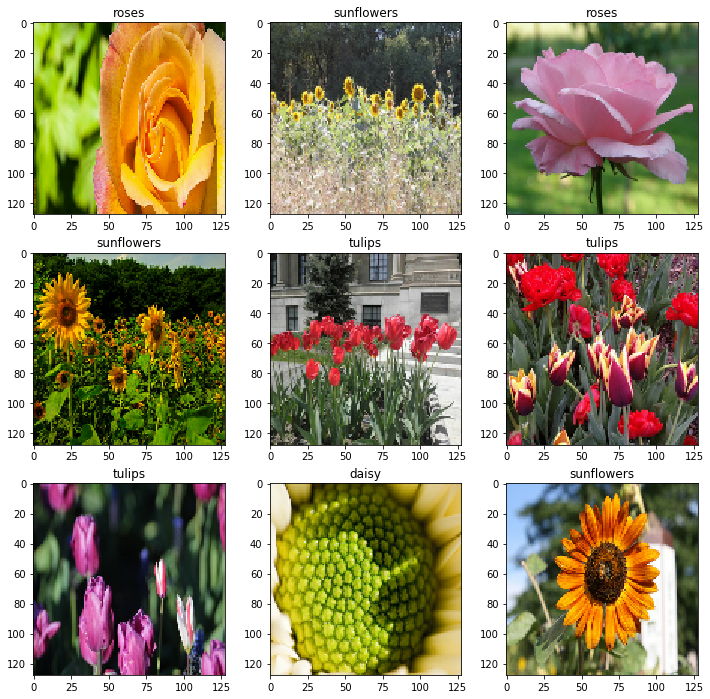

In [11]:
plt.figure(figsize=(12,12)) 
for batch in train.take(1):
    for i in range(9):
        image, label = batch[0][i], batch[1][i]
        plt.subplot(3,3,i+1)
        plt.imshow(image.numpy())
        plt.title(get_label_name(label.numpy()))
        plt.grid(False)

In [25]:
plt.figure(figsize=(12,12)) 
count=0
for batch in tfds.as_numpy(train):
    image, label = batch[0], batch[1]
    print(type(image))
    print(image.shape)
    print(type(label))
    print(label.shape)
    count+=1
print(count)
#     for i in range(9):
#         image, label = batch[0][i], batch[1][i]
#         plt.subplot(3,3,i+1)
#         plt.imshow(image)
#         plt.title(get_label_name(label))
#         plt.grid(False)

<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(32, 128, 128, 3)
<class 'numpy.ndarray'

<Figure size 864x864 with 0 Axes>

### Building image classifier model

In [12]:
from tensorflow import keras

def create_model():
    img_inputs = keras.Input(shape=IMG_SHAPE)
    conv_1 = keras.layers.Conv2D(32, (3, 3), activation='relu')(img_inputs)
    maxpool_1 = keras.layers.MaxPooling2D((2, 2))(conv_1)
    conv_2 = keras.layers.Conv2D(64, (3, 3), activation='relu')(maxpool_1)
    maxpool_2 = keras.layers.MaxPooling2D((2, 2))(conv_2)
    conv_3 = keras.layers.Conv2D(64, (3, 3), activation='relu')(maxpool_2)
    flatten = keras.layers.Flatten()(conv_3)
    dense_1 = keras.layers.Dense(64, activation='relu')(flatten)
    output = keras.layers.Dense(10, activation='softmax')(dense_1)

    model = keras.Model(inputs=img_inputs, outputs=output)
    
    return model

In [13]:
simple_model = create_model()
simple_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0     

In [17]:
keras.utils.plot_model(simple_model, 'fashion_model_with_shape_info.png', show_shapes=True)

"dot" with args ['-Tpng', '/tmp/tmpcg18xnjd'] returned code: 1

stdout, stderr:
 b''
b'Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gv imap imap_np ismap json json0 mp pic plain plain-ext pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4 xdot_json\n'



AssertionError: 1

### Setting training parameters

In [14]:
import datetime, os

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir)

In [15]:
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples * weight/10 for weight in SPLIT_WEIGHTS
)

steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = round(num_val)//BATCH_SIZE

### Performing data augmentation (Optional)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def manually_train_model(model, compile_model=False, epochs=5):
    if compile_model:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

#     tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#     model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#         'training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', period=5)
#     early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience=5)
# See: https://stackoverflow.com/questions/44861149/keras-use-tensorboard-with-train-on-batch
# For using tensorboard callback with train_on_batch()

    
    datagen = ImageDataGenerator(
    #     featurewise_center=True,
    #     featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)
    
    # Performing model training 
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []
    for e in range(epochs):
        print('Epoch', e)
        batches = 0
        loss = 0
        accuracy = 0
        for example in tfds.as_numpy(train):
            x_train, y_train = example[0], example[1]
            for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=BATCH_SIZE):
                curr_loss, curr_accuracy = model.train_on_batch(x_batch, y_batch)
                loss += curr_loss
                accuracy += curr_accuracy
                batches += 1
                if batches >= len(x_train) // 32:
                    # we need to break the loop by hand because
                    # the generator loops indefinitely
                    break
        
        train_losses.append(loss/batches)
        train_accuracies.append(accuracy/batches)
        print('Train Loss:', loss/batches, 'Train Accuracy:', accuracy/batches)
    
        # Validating model on unseen data
        batches = 0
        loss = 0
        accuracy = 0
        for example in tfds.as_numpy(validation):
            x_train, y_train = example[0], example[1]
            for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=BATCH_SIZE):
                curr_loss, curr_accuracy = model.test_on_batch(x_batch, y_batch)
                loss += curr_loss
                accuracy += curr_accuracy
                batches += 1
                if batches >= len(x_train) // 32:
                    # we need to break the loop by hand because
                    # the generator loops indefinitely
                    break

        valid_losses.append(loss/batches)
        valid_accuracies.append(accuracy/batches)
        print('Val Loss:', loss/batches, 'Val Accuracy:', accuracy/batches)
        batches = 0
    
    return train_losses, train_accuracies, valid_losses, valid_accuracies

### Training and model evaluation

In [27]:
def train_model():
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
        'training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', period=5)
    early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience=5)

    history = model.fit(train.repeat(),
              epochs=5, 
              steps_per_epoch=steps_per_epoch,
              validation_data=validation.repeat(),
              validation_steps=validation_steps,
              callbacks=[tensorboard_callback,
                         model_checkpoint_callback,
                         early_stopping_checkpoint])
    
    return history

In [25]:
%load_ext tensorboard.notebook
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 100276), started 23:54:23 ago. (Use '!kill 100276' to kill it.)

In [78]:
!kill 100276

In [19]:
train_losses, train_accuracies, valid_losses, valid_accuracies = manually_train_model( simple_model, compile_model=True)

# OR

# history = train_model()

Epoch 0
Train Loss: 1.333691931962967 Train Accuracy: 0.4303125
Val Loss: 1.208991010983785 Val Accuracy: 0.4335317462682724
Epoch 1
Train Loss: 1.0895640176534653 Train Accuracy: 0.5559375
Val Loss: 1.0914364258448284 Val Accuracy: 0.5476190480921004
Epoch 2
Train Loss: 0.9779948776960373 Train Accuracy: 0.6125
Val Loss: 1.0791311661402385 Val Accuracy: 0.5590277777777778
Epoch 3
Train Loss: 0.9041036051511765 Train Accuracy: 0.6546875
Val Loss: 0.9549024171299405 Val Accuracy: 0.62599206633038
Epoch 4
Train Loss: 0.841822760105133 Train Accuracy: 0.670625
Val Loss: 0.9866574803988138 Val Accuracy: 0.6329365107748244


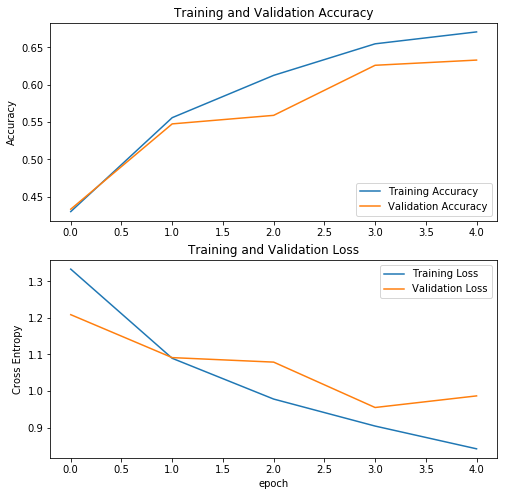

In [21]:
acc = train_accuracies
val_acc = valid_accuracies

loss = train_losses
val_loss = valid_losses

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Using pre-trained model

In [22]:
from tensorflow import keras

# Create the base model from the pre-trained model MobileNet V2
base_model = keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [23]:
base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 63, 63, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization_v1[0][0]     
_______________________________________________________________________________________

### Adding classification head

In [24]:
metadata.splits['train'].num_examples

3670

In [25]:
def build_model():
    
    model = keras.Sequential([
        base_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(metadata.features['label'].num_classes, 
                           activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

inception_model = build_model()
inception_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


### Train the model

In [33]:
# Evaluating model before training (Optional)
loss0, accuracy0 = model.evaluate(validation.repeat(), steps = validation_steps)

10/10 [==============================] - 5s 486ms/step - loss: 2.1873 - accuracy: 0.1755


In [26]:
train_losses, train_accuracies, valid_losses, valid_accuracies = manually_train_model(inception_model)

# OR

# history = model.fit(train.repeat(),
#                     epochs=5,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=validation.repeat(), 
#                     validation_steps=validation_steps)

Epoch 0
Train Loss: 1.3901173818111419 Train Accuracy: 0.420625
Val Loss: 0.9881749682956271 Val Accuracy: 0.6140873034795126
Epoch 1
Train Loss: 1.1026132613420487 Train Accuracy: 0.58875
Val Loss: 0.94287199444241 Val Accuracy: 0.6408730149269104
Epoch 2
Train Loss: 1.0019336694478989 Train Accuracy: 0.629375
Val Loss: 0.9473688271310594 Val Accuracy: 0.6155753996637132
Epoch 3
Train Loss: 0.9587798351049424 Train Accuracy: 0.6346875
Val Loss: 0.954926868279775 Val Accuracy: 0.6502976218859354
Epoch 4
Train Loss: 0.9317176187038422 Train Accuracy: 0.6603125
Val Loss: 0.8895596133338081 Val Accuracy: 0.6939484145906236


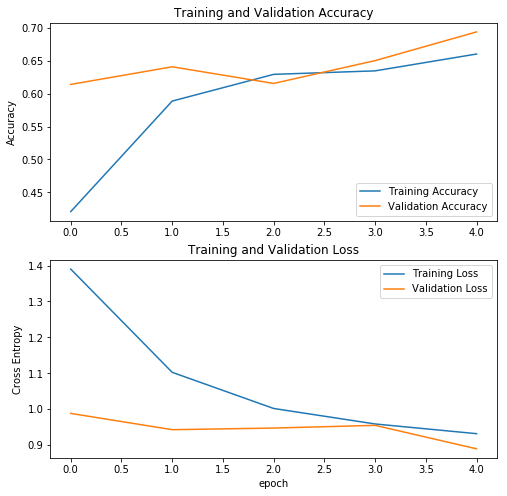

In [28]:
acc = train_accuracies
val_acc = valid_accuracies

loss = train_losses
val_loss = valid_losses

# OR

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [31]:
# Save keras model
inception_model.save('inception_v3_128_tf_flowes.h5')

In [32]:
loaded_model = keras.models.load_model('inception_v3_128_tf_flowes.h5')
loaded_model.evaluate(test)

W0314 18:51:00.480627 140020271679296 hdf5_format.py:261] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


      7/Unknown - 2s 324ms/step - loss: 0.8607 - accuracy: 0.6900

[0.8606512205941337, 0.69]

### Fine tuning the model

In [34]:
# Un-freeze the top layers of the model
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 249

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False
    
inception_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
inception_model.summary()

Number of layers in the base model:  311
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 11,125,125
Non-trainable params: 10,687,904
_________________________________________________________________


In [35]:
train_losses, train_accuracies, valid_losses, valid_accuracies = manually_train_model(inception_model)

# OR

# history_fine = model.fit(train.repeat(), 
#                          steps_per_epoch = steps_per_epoch,
#                          epochs=10, 
#                          initial_epoch = 5,
#                          validation_data=validation.repeat(), 
#                          validation_steps=validation_steps)

Epoch 0
Train Loss: 0.8866492494940758 Train Accuracy: 0.7090625
Val Loss: 2.5718252460161843 Val Accuracy: 0.7817460298538208
Epoch 1
Train Loss: 0.6015821832418442 Train Accuracy: 0.79625
Val Loss: 0.9219881776306365 Val Accuracy: 0.8278769850730896
Epoch 2
Train Loss: 0.5222328102588654 Train Accuracy: 0.825625
Val Loss: 0.6613628533151414 Val Accuracy: 0.7956349187427096
Epoch 3
Train Loss: 0.44445202603936196 Train Accuracy: 0.8565625
Val Loss: 0.8049592541323768 Val Accuracy: 0.8373015854093764
Epoch 4
Train Loss: 0.40070351541042326 Train Accuracy: 0.8665625
Val Loss: 0.9143406550089518 Val Accuracy: 0.8244047628508674


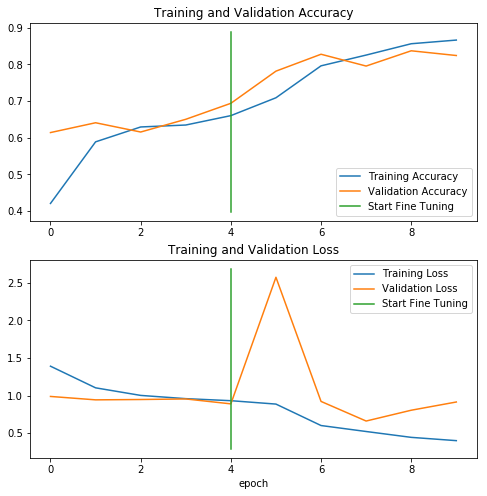

In [36]:
acc += train_accuracies
val_acc += valid_accuracies

loss += train_losses
val_loss += valid_losses

# OR

# acc += history_fine.history['accuracy']
# val_acc += history_fine.history['val_accuracy']

# loss += history_fine.history['loss']
# val_loss += history_fine.history['val_loss']

initial_epochs=5

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1], 
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1], 
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Serving model in production

In [37]:
from tensorflow import keras

In [41]:
path_to_saved_model = 'SavedModel/inceptionv3_128_tf_flowes/1'

In [42]:
# Saving the keras model in SavedModel format
keras.experimental.export_saved_model(inception_model, path_to_saved_model)

W0314 19:06:35.579655 140020271679296 deprecation.py:323] From /home/himanshu/tf2/lib/python3.6/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:253: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0314 19:06:35.581201 140020271679296 tf_logging.py:161] Export includes no default signature!
W0314 19:06:48.823983 140020271679296 tf_logging.py:161] Export includes no default signature!


In [43]:
restored_saved_model = keras.experimental.load_from_saved_model(path_to_saved_model)
# restored_saved_model.predict(test)

In [44]:
!tensorflow_model_server --model_base_path=/home/ubuntu/Desktop/Medium/TF2.0/SavedModel/mobilenetv2_1.00_128_tf_flowes/ --rest_api_port=9000 --model_name=FlowerClassifier

/usr/bin/sh: tensorflow_model_server: command not found


In [18]:
import json
import requests
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.preprocessing import image
import numpy as np

In [19]:
image_path = 'sunflower.jpg'

In [73]:
def get_top_k_predictions(pred, k=3):
    predictions = np.array(pred['predictions'])[0]
    print('Top {} predictions:'.format(k))
    top_k_indices = np.argpartition(predictions, -k)[-k:]
    top_k_labels = list(map(get_label_name, top_k_indices))
    top_k_scores = predictions[top_k_indices]
    top_k_preds = list(zip(top_k_labels, top_k_scores))
    top_k_preds.sort(key=lambda x: -x[1])
    print(top_k_preds)

In [77]:
# Preprocessing our input image
img = image.img_to_array(image.load_img(image_path, target_size=(128, 128))) / 255.
img = np.expand_dims(img, axis=0)
payload = {"instances": img.tolist()}

# headers = {"content-type": "application/json"}
# sending post request to TensorFlow Serving server
json_response = requests.post('http://localhost:9000/v1/models/FlowerClassifier:predict', json=payload)
pred = json.loads(json_response.content.decode('utf-8'))

# Decoding the response
# decode_predictions(preds, top=5) by default gives top 5 results
# You can pass "k=5" to get top 5 predicitons
get_top_k_predictions(pred, k=3)

Top 3 predictions:
[('sunflowers', 0.978735), ('tulips', 0.0145516), ('roses', 0.00366251)]
